In [1]:
#importing Libraries :)

import tensorflow as tf
import numpy as np
import pandas as pd

from tensorflow import keras
from keras.layers import Conv1D, MaxPooling1D, UpSampling1D, Dense, Dropout, Flatten,Input, BatchNormalization
from keras.models import Sequential, Model
from keras import regularizers
from keras.callbacks import History 
history = History()

import matplotlib.pyplot as plt
from keras.layers import Dense,Activation,Layer,Lambda

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
#load dataset

dataset=pd.read_csv("covtype.csv")

In [3]:
dataset.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
dataset.shape

(581012, 55)

In [5]:
#check for null values
dataset.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


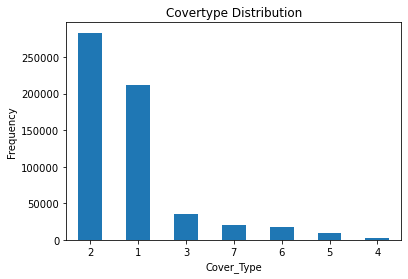

In [6]:
count_classes = pd.value_counts(dataset['Cover_Type'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Covertype Distribution")
plt.xlabel("Cover_Type")
plt.ylabel("Frequency")
plt.savefig("Covertype Distribution")
plt.show()

In [7]:
y = dataset.iloc[:,-1].values
x = dataset.drop(["Cover_Type"],axis=1)
x.shape,y.shape

((581012, 54), (581012,))

In [8]:
cov1 = dataset[dataset['Cover_Type']==1]
cov2 = dataset[dataset['Cover_Type']==2]
cov3 = dataset[dataset['Cover_Type']==3]
cov4 = dataset[dataset['Cover_Type']==4]
cov5 = dataset[dataset['Cover_Type']==5]
cov6 = dataset[dataset['Cover_Type']==6]
cov7 = dataset[dataset['Cover_Type']==7]
print(cov1.shape,cov2.shape,cov3.shape,cov4.shape,cov5.shape,cov6.shape,cov7.shape)

(211840, 55) (283301, 55) (35754, 55) (2747, 55) (9493, 55) (17367, 55) (20510, 55)


In [9]:
# Implementing Undersampling for Handling Imbalanced 
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_res,y_res=nm.fit_sample(x,y)

In [10]:
X_res.shape,y_res.shape

((19229, 54), (19229,))

In [11]:
X_res

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2466,354,20,0,0,807,182,201,153,1463,...,0,0,1,0,0,0,0,0,0,0
1,2531,23,9,42,0,735,215,221,142,890,...,0,0,0,0,0,0,0,0,0,0
2,2533,36,4,30,0,750,220,230,147,860,...,0,0,0,0,0,0,0,0,0,0
3,2530,20,6,30,-3,742,216,228,149,875,...,0,0,0,0,0,0,0,0,0,0
4,2470,309,10,0,0,828,193,234,181,1455,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19224,3290,334,22,277,64,1905,163,204,177,467,...,0,0,0,0,0,0,0,0,1,0
19225,3284,47,24,808,188,1253,220,182,84,1816,...,0,0,0,0,0,0,0,0,0,1
19226,3412,328,38,277,152,1054,103,166,186,1577,...,0,0,0,0,0,0,0,0,1,0
19227,3271,286,12,342,113,930,186,240,194,2255,...,0,0,0,0,0,0,0,0,1,0


In [12]:
X_res.to_numpy()

array([[2466,  354,   20, ...,    0,    0,    0],
       [2531,   23,    9, ...,    0,    0,    0],
       [2533,   36,    4, ...,    0,    0,    0],
       ...,
       [3412,  328,   38, ...,    0,    1,    0],
       [3271,  286,   12, ...,    0,    1,    0],
       [3395,   34,   10, ...,    0,    0,    1]], dtype=int64)

In [13]:
X_res.shape

(19229, 54)

In [14]:
#Feature Scaling
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X_res)

In [15]:
#spliting the dataset into train and test set

x_train,x_test,y_train,y_test= train_test_split(x_scaled,y_res,test_size = 0.1, random_state = 0)
x_train,x_val,y_train,y_val= train_test_split(x_train,y_train,test_size = 0.2, random_state = 0)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(13844, 54)
(1923, 54)
(3462, 54)


In [17]:
x_train = x_train.reshape(13844, 54,1)
x_test = x_test.reshape(1923, 54,1)
x_val = x_val.reshape(3462, 54,1)

In [18]:
input_data = Input(shape=(54,1))
#encoder
encoded = Conv1D(16, 3, activation="relu")(input_data)
encoded = BatchNormalization()(encoded)
encoded = MaxPooling1D(2, padding="same")(encoded) 

encoded = Conv1D(8, 3, activation="relu")(encoded)
encoded = BatchNormalization()(encoded)
encoded = MaxPooling1D(2, padding="same")(encoded)

encoded = Conv1D(4, 3, activation="relu", padding="same")(encoded)
encoded = BatchNormalization()(encoded)
encoded = MaxPooling1D(2, padding="same")(encoded)

# 3 dimensions in the encoded layer
encoded = Conv1D(1, 3, activation="relu", padding="same")(encoded)
encoded = MaxPooling1D(2, padding="same")(encoded)

#decoder
decoded = UpSampling1D(3)(encoded)
decoded = Conv1D(4, 3, activation='relu', padding="same")(decoded)
decoded = BatchNormalization()(decoded)

decoded = UpSampling1D(3)(decoded)
decoded = Conv1D(8, 3, activation='relu', padding="same")(decoded)
decoded = BatchNormalization()(decoded)

decoded = UpSampling1D(2)(decoded)
decoded = Conv1D(16, 3, activation='relu', padding="same")(decoded)
decoded = BatchNormalization()(decoded)

decoded = Conv1D(1, 3, activation='sigmoid', padding='same')(decoded)

encoder = Model(input_data, encoded)

In [19]:
autoencoder = Model(input_data, decoded)
autoencoder.compile(loss="mse",optimizer='Adam')
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 54, 1)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 52, 16)            64        
_________________________________________________________________
batch_normalization_1 (Batch (None, 52, 16)            64        
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 26, 16)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 24, 8)             392       
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 8)             32        
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 12, 8)             0   

In [20]:
history = autoencoder.fit(x_train, x_train,
                epochs=500,
                batch_size=512,
                shuffle=True,
                validation_data=(x_val, x_val))

Train on 13844 samples, validate on 3462 samples
Epoch 1/500
13844/13844 [==============================] - 3s 208us/step - loss: 0.1935 - val_loss: 0.1896
Epoch 2/500
13844/13844 [==============================] - 2s 126us/step - loss: 0.1458 - val_loss: 0.1604
Epoch 3/500
13844/13844 [==============================] - 2s 126us/step - loss: 0.1071 - val_loss: 0.1235
Epoch 4/500
13844/13844 [==============================] - 2s 127us/step - loss: 0.0737 - val_loss: 0.0892
Epoch 5/500
13844/13844 [==============================] - 2s 126us/step - loss: 0.0580 - val_loss: 0.0766
Epoch 6/500
13844/13844 [==============================] - 2s 126us/step - loss: 0.0521 - val_loss: 0.0736
Epoch 7/500
13844/13844 [==============================] - 2s 125us/step - loss: 0.0490 - val_loss: 0.0731
Epoch 8/500
13844/13844 [==============================] - 2s 126us/step - loss: 0.0466 - val_loss: 0.0735
Epoch 9/500
13844/13844 [==============================] - 2s 126us/step - loss: 0.0423 - val_l

13844/13844 [==============================] - 2s 128us/step - loss: 0.0137 - val_loss: 0.0166
Epoch 77/500
13844/13844 [==============================] - 2s 129us/step - loss: 0.0130 - val_loss: 0.0163
Epoch 78/500
13844/13844 [==============================] - 2s 129us/step - loss: 0.0129 - val_loss: 0.0140
Epoch 79/500
13844/13844 [==============================] - 2s 128us/step - loss: 0.0125 - val_loss: 0.0131
Epoch 80/500
13844/13844 [==============================] - 2s 129us/step - loss: 0.0120 - val_loss: 0.0128
Epoch 81/500
13844/13844 [==============================] - 2s 129us/step - loss: 0.0119 - val_loss: 0.0141
Epoch 82/500
13844/13844 [==============================] - 2s 130us/step - loss: 0.0118 - val_loss: 0.0123
Epoch 83/500
13844/13844 [==============================] - 2s 130us/step - loss: 0.0120 - val_loss: 0.0127
Epoch 84/500
13844/13844 [==============================] - 2s 130us/step - loss: 0.0116 - val_loss: 0.0137
Epoch 85/500
13844/13844 [===============

13844/13844 [==============================] - 2s 131us/step - loss: 0.0099 - val_loss: 0.0097
Epoch 152/500
13844/13844 [==============================] - 2s 128us/step - loss: 0.0098 - val_loss: 0.0094
Epoch 153/500
13844/13844 [==============================] - 2s 132us/step - loss: 0.0099 - val_loss: 0.0099
Epoch 154/500
13844/13844 [==============================] - 2s 130us/step - loss: 0.0100 - val_loss: 0.0106
Epoch 155/500
13844/13844 [==============================] - 2s 130us/step - loss: 0.0103 - val_loss: 0.0119
Epoch 156/500
13844/13844 [==============================] - 2s 129us/step - loss: 0.0103 - val_loss: 0.0101
Epoch 157/500
13844/13844 [==============================] - 2s 130us/step - loss: 0.0100 - val_loss: 0.0096
Epoch 158/500
13844/13844 [==============================] - 2s 129us/step - loss: 0.0101 - val_loss: 0.0096
Epoch 159/500
13844/13844 [==============================] - 2s 131us/step - loss: 0.0101 - val_loss: 0.0099
Epoch 160/500
13844/13844 [======

13844/13844 [==============================] - 2s 125us/step - loss: 0.0090 - val_loss: 0.0095
Epoch 227/500
13844/13844 [==============================] - 2s 136us/step - loss: 0.0089 - val_loss: 0.0106
Epoch 228/500
13844/13844 [==============================] - 2s 139us/step - loss: 0.0090 - val_loss: 0.0093
Epoch 229/500
13844/13844 [==============================] - 2s 154us/step - loss: 0.0095 - val_loss: 0.0091
Epoch 230/500
13844/13844 [==============================] - 2s 169us/step - loss: 0.0089 - val_loss: 0.0088
Epoch 231/500
13844/13844 [==============================] - 2s 149us/step - loss: 0.0091 - val_loss: 0.0095
Epoch 232/500
13844/13844 [==============================] - 2s 153us/step - loss: 0.0097 - val_loss: 0.0093
Epoch 233/500
13844/13844 [==============================] - 2s 152us/step - loss: 0.0092 - val_loss: 0.0099
Epoch 234/500
13844/13844 [==============================] - 3s 197us/step - loss: 0.0089 - val_loss: 0.0086
Epoch 235/500
13844/13844 [======

Epoch 301/500
13844/13844 [==============================] - 2s 122us/step - loss: 0.0086 - val_loss: 0.0084
Epoch 302/500
13844/13844 [==============================] - 2s 125us/step - loss: 0.0086 - val_loss: 0.0086
Epoch 303/500
13844/13844 [==============================] - 2s 123us/step - loss: 0.0084 - val_loss: 0.0085
Epoch 304/500
13844/13844 [==============================] - 2s 123us/step - loss: 0.0089 - val_loss: 0.0084
Epoch 305/500
13844/13844 [==============================] - 2s 122us/step - loss: 0.0088 - val_loss: 0.0084
Epoch 306/500
13844/13844 [==============================] - 2s 122us/step - loss: 0.0084 - val_loss: 0.0085
Epoch 307/500
13844/13844 [==============================] - 2s 127us/step - loss: 0.0091 - val_loss: 0.0087
Epoch 308/500
13844/13844 [==============================] - 2s 123us/step - loss: 0.0089 - val_loss: 0.0089
Epoch 309/500
13844/13844 [==============================] - 2s 122us/step - loss: 0.0087 - val_loss: 0.0089
Epoch 310/500
13844

13844/13844 [==============================] - 2s 127us/step - loss: 0.0086 - val_loss: 0.0085
Epoch 377/500
13844/13844 [==============================] - 2s 126us/step - loss: 0.0088 - val_loss: 0.0101
Epoch 378/500
13844/13844 [==============================] - 2s 123us/step - loss: 0.0104 - val_loss: 0.0146
Epoch 379/500
13844/13844 [==============================] - 2s 122us/step - loss: 0.0088 - val_loss: 0.0103
Epoch 380/500
13844/13844 [==============================] - 2s 122us/step - loss: 0.0095 - val_loss: 0.0107
Epoch 381/500
13844/13844 [==============================] - 2s 122us/step - loss: 0.0088 - val_loss: 0.0088
Epoch 382/500
13844/13844 [==============================] - 2s 123us/step - loss: 0.0084 - val_loss: 0.0081
Epoch 383/500
13844/13844 [==============================] - 2s 123us/step - loss: 0.0085 - val_loss: 0.0079
Epoch 384/500
13844/13844 [==============================] - 2s 122us/step - loss: 0.0088 - val_loss: 0.0085
Epoch 385/500
13844/13844 [======

13844/13844 [==============================] - 2s 130us/step - loss: 0.0080 - val_loss: 0.0085
Epoch 452/500
13844/13844 [==============================] - 2s 130us/step - loss: 0.0084 - val_loss: 0.0076
Epoch 453/500
13844/13844 [==============================] - 2s 132us/step - loss: 0.0083 - val_loss: 0.0083
Epoch 454/500
13844/13844 [==============================] - 2s 130us/step - loss: 0.0086 - val_loss: 0.0083
Epoch 455/500
13844/13844 [==============================] - 2s 131us/step - loss: 0.0079 - val_loss: 0.0077
Epoch 456/500
13844/13844 [==============================] - 2s 131us/step - loss: 0.0081 - val_loss: 0.0077
Epoch 457/500
13844/13844 [==============================] - 2s 131us/step - loss: 0.0080 - val_loss: 0.0080
Epoch 458/500
13844/13844 [==============================] - 2s 130us/step - loss: 0.0080 - val_loss: 0.0075
Epoch 459/500
13844/13844 [==============================] - 2s 130us/step - loss: 0.0080 - val_loss: 0.0081
Epoch 460/500
13844/13844 [======

In [21]:
evaluation = autoencoder.evaluate(x_test, x_test)
print("Loss:",evaluation)

1923/1923 [==============================] - 0s 95us/step
Loss: 0.007760371608336108


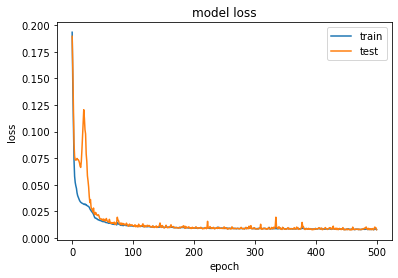

In [22]:
# Plot training loss and validation split loss over the epochs
#print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('convAE_model_loss.png')
plt.show()

In [23]:
evaluation = autoencoder.evaluate(x_test, x_test)

print("Loss:",evaluation)
data = autoencoder.predict(x_test)

1923/1923 [==============================] - 0s 95us/step
Loss: 0.007760371608336108


In [24]:
encoder = Model(input_data, encoded)
latent_vector_train = encoder.predict(x_train)
latent_vector = encoder.predict(x_test)

In [25]:
latent_vector.shape

(1923, 3, 1)

In [26]:
latent_vector = latent_vector.reshape(1923, 3)
latent_vector_train = latent_vector_train.reshape(13844, 3)

In [27]:
latent_vector

array([[0.30750638, 1.5219055 , 0.        ],
       [0.5671185 , 3.142868  , 1.0850204 ],
       [1.0691237 , 0.5365613 , 1.0850204 ],
       ...,
       [1.0213952 , 0.4985094 , 2.1880305 ],
       [0.26339954, 1.5252407 , 0.        ],
       [1.0414414 , 0.49562502, 2.1880305 ]], dtype=float32)

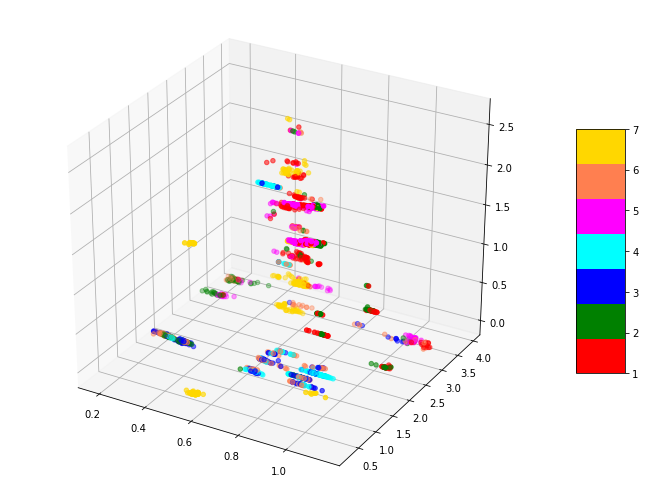

In [28]:
import matplotlib
%matplotlib inline
from mpl_toolkits import mplot3d
colors=['red','green','blue','cyan','magenta','coral','gold']
plt.figure(figsize =(12, 9))
ax = plt.axes(projection='3d')
surf = ax.scatter3D(latent_vector[:, 0], latent_vector[:, 1], latent_vector[:, 2], c=y_test, cmap=matplotlib.colors.ListedColormap(colors))
# Add a color bar which maps values to colors.
cb = plt.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('convAE_3d.png')
plt.show()

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knnscores = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(latent_vector_train, y_train)
    k = knn.score(latent_vector,y_test)
    knnscores.append(k)

s = np.array(knnscores)
result = np.where(s == s.max())
print('Knn Score : ',s.max(),'and k : ', result[0])

Knn Score :  0.7108684347373895 and k :  [14]


In [30]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

y_pred = knn.predict(latent_vector)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Mean Absolute Error: 0.7446697867914717
Mean Squared Error: 2.422256890275611
Root Mean Squared Error: 1.5563601415725123
[[215  19   0   0  28   3   4]
 [ 23 172  20   3  13  34   4]
 [  0  22 123  59   1  62   0]
 [  0  13  41 185   0  27   0]
 [ 25  11   1   0 245   3   1]
 [  7  37  57  21   7 145   0]
 [  9   3   0   0   8   0 272]]
              precision    recall  f1-score   support

           1       0.77      0.80      0.78       269
           2       0.62      0.64      0.63       269
           3       0.51      0.46      0.48       267
           4       0.69      0.70      0.69       266
           5       0.81      0.86      0.83       286
           6       0.53      0.53      0.53       274
           7       0.97      0.93      0.95       292

    accuracy                           0.71      1923
   macro avg       0.70      0.70      0.70      1923
weighted avg       0.70      0.71      0.70      1923

